In [108]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import math

# initial conditions
g = 9.8
h = 10.
theta = math.radians(30)
v0 = 30.
dt=0.01
m=1
beta=0.1

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

x0 = 0
y0 = h

dt=0.1


# generate list of times for sampling
times = np.arange(0., 100000., dt)

#print first 10 elements
print("first time values", times[:10])

def analytical(t):
    return [v0x*np.exp(-beta*t/m), v0y*np.exp(-beta*t/m)-m*g/beta*(1-np.exp(-beta*t/m))]

def rungekutta():
    vx=[v0x]
    vy=[v0y]
    for t in times:
        k1x=dt*(-beta/m*vx[-1])
        k2x=dt*(-beta/m*(vx[-1]+k1x*dt/2))
    
        k1y=dt*(-g-beta/m*vy[-1])
        k2y=dt*(-g-beta/m*(vy[-1]+k1y*dt/2))
        vx.append(vx[-1]+k2x)
        vy.append(vy[-1]+k2y)
    vx.pop(-1)
    vy.pop(-1)
    return [vx,vy]



# compute x(t_i) and y(t_i)
vel = [ analytical(t) for t in times]
vel = np.array(vel)


velrk = rungekutta()
velrk = np.array(velrk)
velrk = np.transpose(velrk)

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
first time values [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [109]:
print(vel)
print(velrk.shape)

[[ 25.98076211  15.        ]
 [ 25.72224921  13.87563121]
 [ 25.46630856  12.76245008]
 ...
 [  0.         -98.        ]
 [  0.         -98.        ]
 [  0.         -98.        ]]
(1000000, 2)


<IPython.core.display.Javascript object>


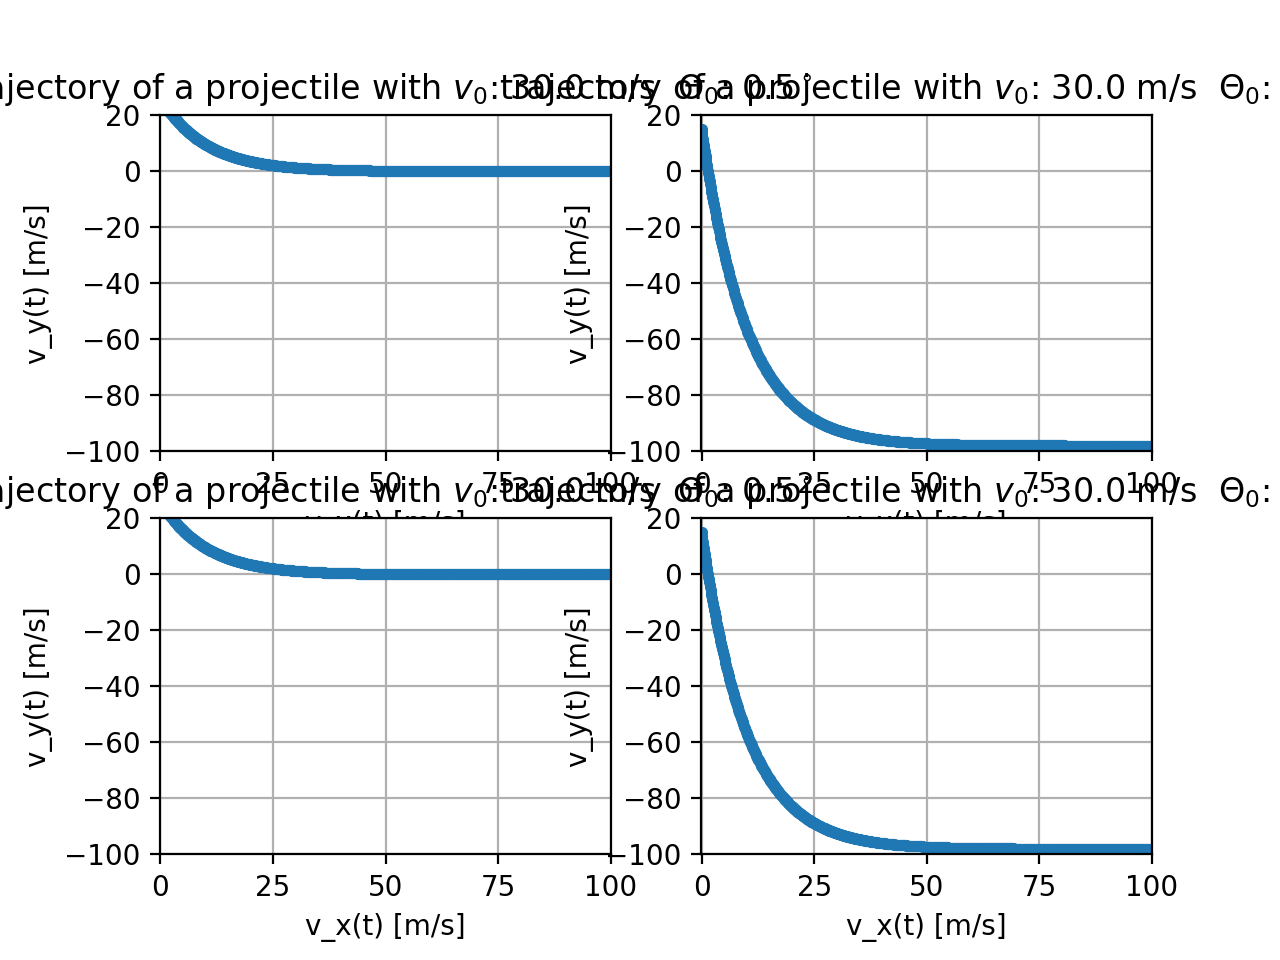

In [133]:
# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(221, autoscale_on=False, xlim=(-0.1, 100), ylim=(-100,20), label="ciao")
ax.grid()
ax.set_xlabel('v_x(t) [m/s]')
ax.set_ylabel("v_y(t) [m/s]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))


# try also '--', 'x','.'
ax.plot(times, vel[:,0], '.', lw=2)


ax1 = fig.add_subplot(222, autoscale_on=False, xlim=(-0.1, 100), ylim=(-100,20), label="ciao")
ax1.grid()
ax1.set_xlabel('v_x(t) [m/s]')
ax1.set_ylabel("v_y(t) [m/s]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))


# try also '--', 'x','.'
ax1.plot(times, vel[:,1], '.', lw=2)


ax2 = fig.add_subplot(223, autoscale_on=False, xlim=(-0.1, 100), ylim=(-100,20), label="ciao")
ax2.grid()
ax2.set_xlabel('v_x(t) [m/s]')
ax2.set_ylabel("v_y(t) [m/s]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))


# try also '--', 'x','.'
ax2.plot(times, velrk[:,0], '.', lw=2)


ax3 = fig.add_subplot(224, autoscale_on=False, xlim=(-0.1, 100), ylim=(-100,20), label="ciao")
ax3.grid()
ax3.set_xlabel('v_x(t) [m/s]')
ax3.set_ylabel("v_y(t) [m/s]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))


# try also '--', 'x','.'
ax3.plot(times, velrk[:,1], '.', lw=2)

plt.show()

<IPython.core.display.Javascript object>


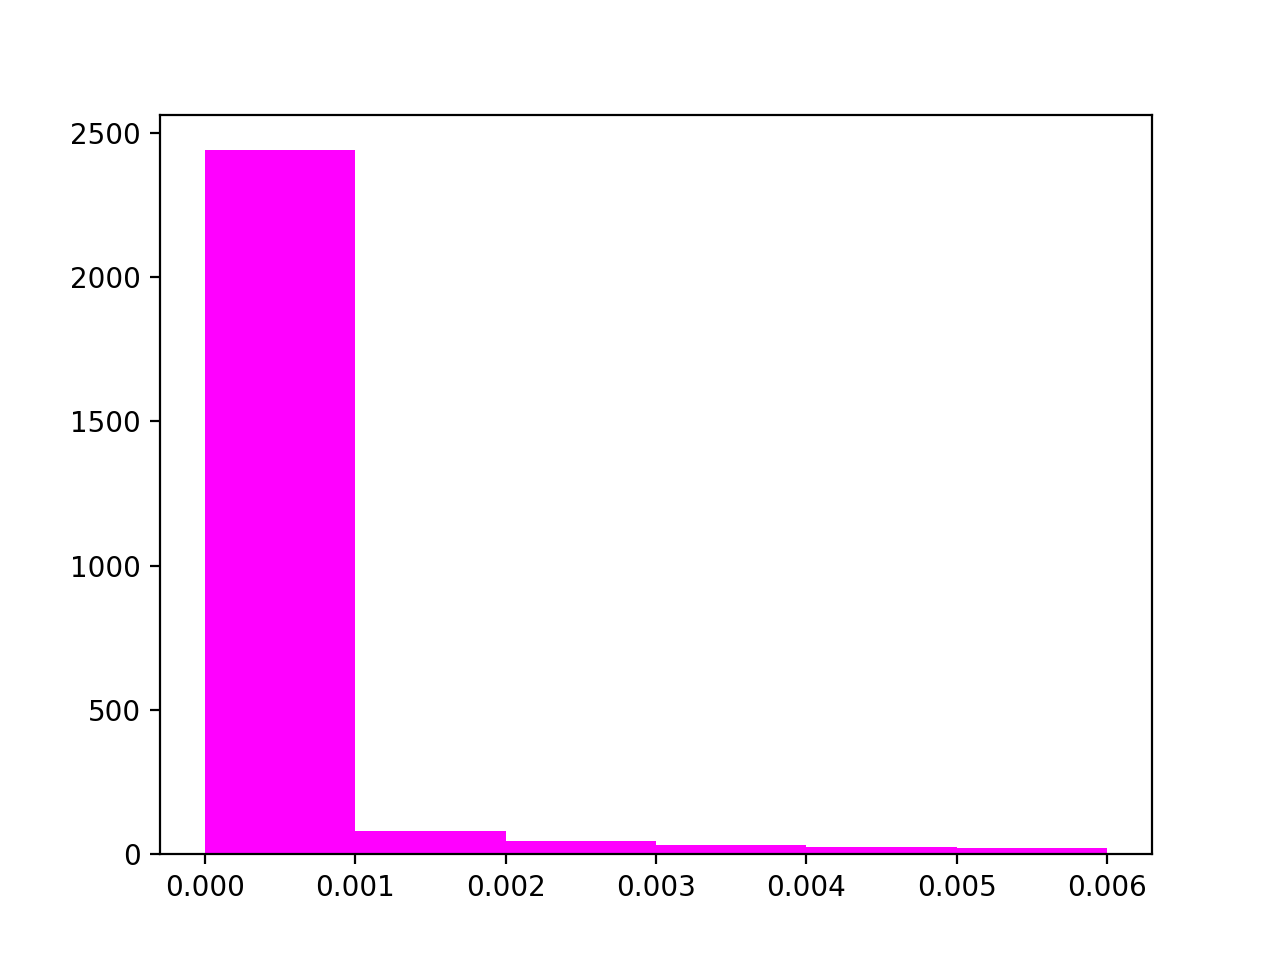

<function matplotlib.pyplot.show(*args, **kw)>

In [145]:
plt.hist(vel[:,1]-velrk[:,1],bins=[0,0.001,0.002,0.003,0.004,0.005,0.006],color="magenta")
plt.show

In [141]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n